# Ví dụ 1  
(Dữ liệu tự tạo)  

## Tạo data  
Tạo data có 200 mẫu (N = 200) phân đều 2 class. d = 2.  

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 
np.random.seed(10) 
means = [[2, 2], [4, 2]] 
cov = [[.3, .2], [.2, .3]] 
N = 100 
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1 
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 
X = np.concatenate((X0.T, X1.T), axis = 1) # all data 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 

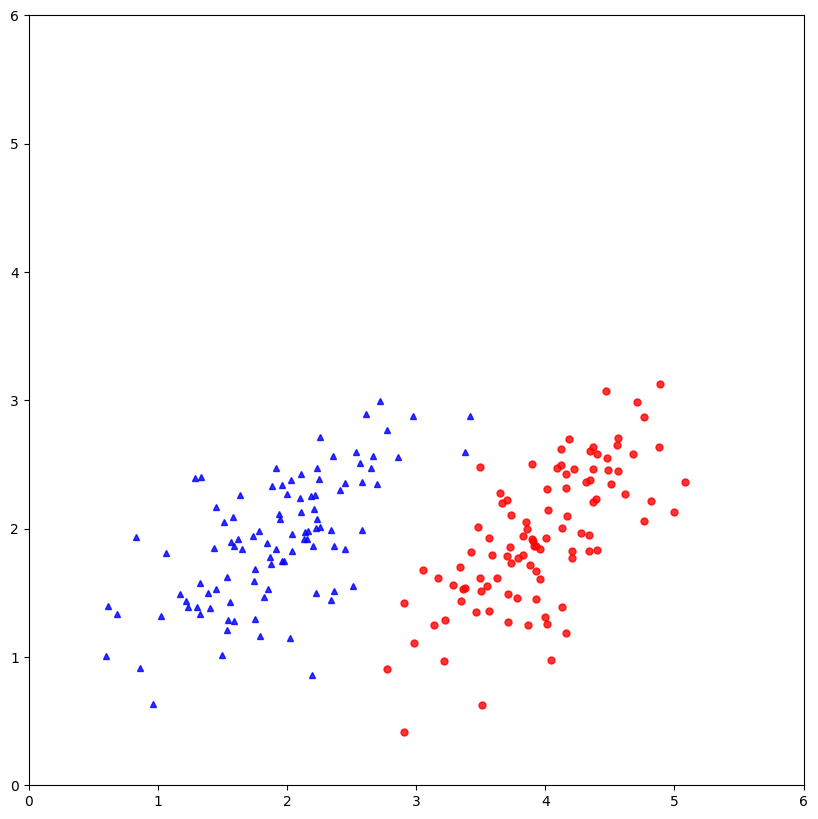

In [2]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(10, 10)) 
ani = plt.cla() 
#plot points 
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize = 5, alpha = .8) 
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize = 5, alpha = .8) 
ani = plt.axis([0 , 6, 0, 6]) 
plt.show()

## Giải bài toán tối ưu $-g(\lambda) \to min$ (sử dụng cvxopt để giải)

In [3]:
# !pip install cvxopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 120.2 kB/s eta 0:00:0000:0100:04


In [4]:
from cvxopt import matrix, solvers# build P ~ K
V = np.concatenate((X0.T, -X1.T), axis = 1)
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((2*N, 1))) # all-one vector
# build A, b, G, h
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0! note that we solve -g(lambda) -> min
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394978e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265242e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750933e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883549e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839273e-10 4.52413498e-10 5.71685468e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.46493582e-10 6.24525894e-1

Do các giá trị $\lambda$ giải bằng thư viện CVXOPT được tính theo phương pháp lặp, nên hầu hết chúng không có
giá trị 0 tuyệt đối mà chỉ là rất nhỏ (cỡ $10^{-9}$). Vì vậy chúng ta sẽ cần loại bỏ các giá trị $\lambda$ quá nhỏ trong kết
quả (thực chất đó là 0 nhưng phương pháp giải lặp có sai số tính toán).

In [5]:
epsilon = 1e-6 # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.241417859332664


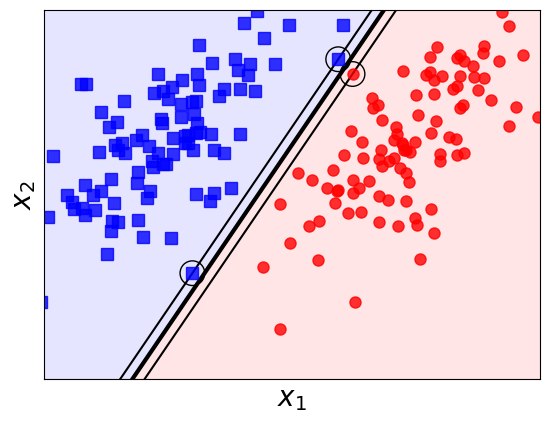

In [8]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('output/svm_hardmargin_output_vd1.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()
    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - w0/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (w0-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (w0+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='red', alpha=0.1)
    plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)
    # hide tikcs
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    # add circles around support vectors
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)
    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
    # plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()

## Thực hiện SVM HardMargin qua thư viện 

In [9]:
from sklearn.svm import SVC
# Copy and put code for generate data here
y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # just a big number: then will be hard margin | else if nearly 0 then be soft margin 
# if C is small, method will be “SoftMagin SVM”,
# if C is large enough, method is near to hard margin
clf.fit(X1, y1)
w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('W0 = ', w0)

w =  [[-10.10242378   6.88613861]]
W0 =  [17.23542499]


## So sánh bộ trọng số của cách dùng đúng công thức lý thuyết & dùng thư viện sklearn  
Bộ trọng số của cách dùng công thức lý thuyết khá tương đồng với Bộ trọng số của cách dùng thư viện sklearn  

# Bài thực hành 1  
(Dữ liệu tự tạo ở ví dụ 1 (train set) - Dữ liệu tự tạo mới (test set))  

# Bài thực hành 2  

# Ví dụ 2  
(Dữ liệu sóng thủy âm Sonar)  

Tệp dữ liệu có 60 cột ứng với 60 thuộc tính (trường) không có tiêu đề, là tham số của các mẫu sóng âm phản hồi; cột thứ
61 là đầu ra phân loại (y), với ký tự "R" nghĩa là Rock; ký tự "M" nghĩa là Mine (vật thể kim loại hình trụ).  
  
Toàn bộ tệp có 208 bản ghi. Thông tin thêm về dữ liệu có thể tìm hiểu tại link
https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks) hoặc có thể lấy
trong tệp Sonar.all-data.csv đính kèm.  
  
Tham khảo lại phần hướng dẫn cho mô hình perceptron để nắm các thao tác đọc dữ liệu, định dạng lại dữ
liệu (chuyển M thành class 1 và chuyển R thành class -1).  
  
Đọc dữ liệu và sử dụng mô hình SVM với hard margin để phân loại cho dữ liệu này

## Read data  

In [ ]:
# %pip install pandas
# %pip install seaborn

In [28]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("data/sonar.csv", header=None)

<Axes: ylabel='60'>

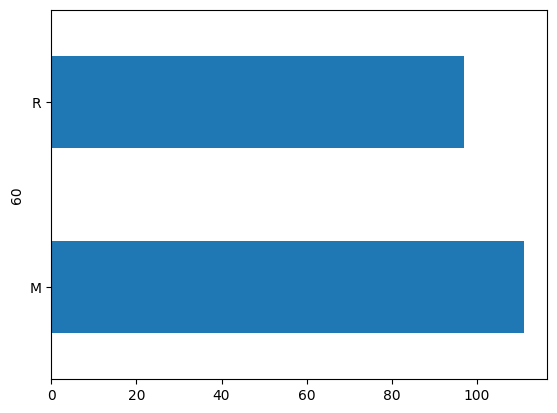

In [14]:
# Kiểm tra độ cân bằng của data
data[60].value_counts().plot(kind='barh') 

## Mã hóa data

In [15]:
# Chuyển đổi nhãn "M" thành 1 và nhãn "R" thành -1
data[60] = data[60].apply(lambda x: 1 if x == "M" else -1)

# Tách dữ liệu thành features (X) và nhãn (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Phân tách data  

In [16]:
# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualize data

In [21]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Giảm chiều dữ liệu xuống 3D bằng PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

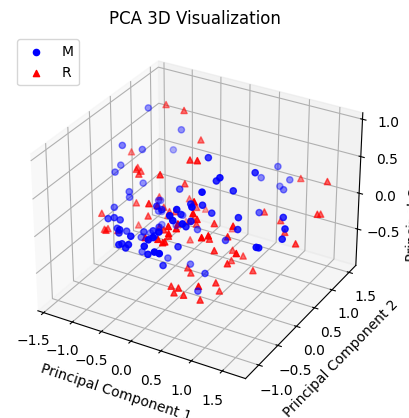

In [22]:
# Trực quan hóa dữ liệu
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tách dữ liệu thành 2 lớp để trực quan hóa
X_class1 = X_train_pca[y_train == 1]
X_class2 = X_train_pca[y_train == -1]

# Trực quan hóa dữ liệu huấn luyện
ax.scatter(X_class1[:, 0], X_class1[:, 1], X_class1[:, 2], c='b', marker='o', label='M')
ax.scatter(X_class2[:, 0], X_class2[:, 1], X_class2[:, 2], c='r', marker='^', label='R')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(loc='upper left')
plt.title('PCA 3D Visualization')
plt.show()

## Dùng SVM Hard Margin  

In [19]:
# Huấn luyện mô hình SVM với hard margin
model = SVC(kernel='linear', C=1e10)
model.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

## Đánh giá mô hình

In [31]:
# Đánh giá mô hình trên tập kiểm tra
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy_train)

Accuracy: 1.0


In [20]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


Confusion Matrix:
[[14  2]
 [ 5 21]]


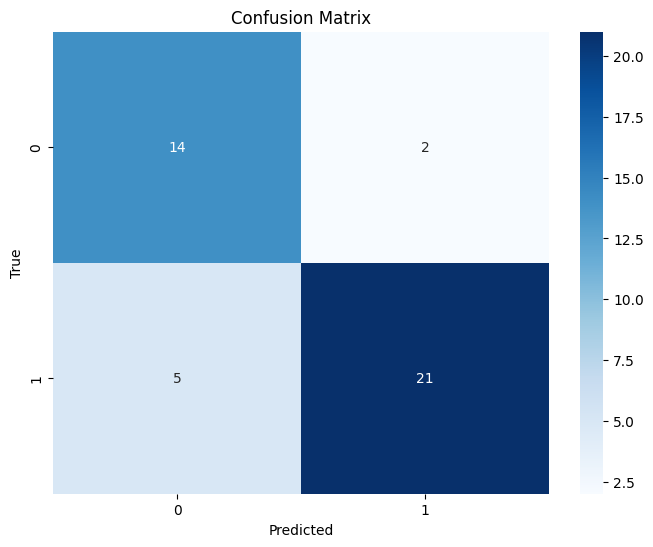

In [29]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Trực quan hóa ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Giải thích kết quả  

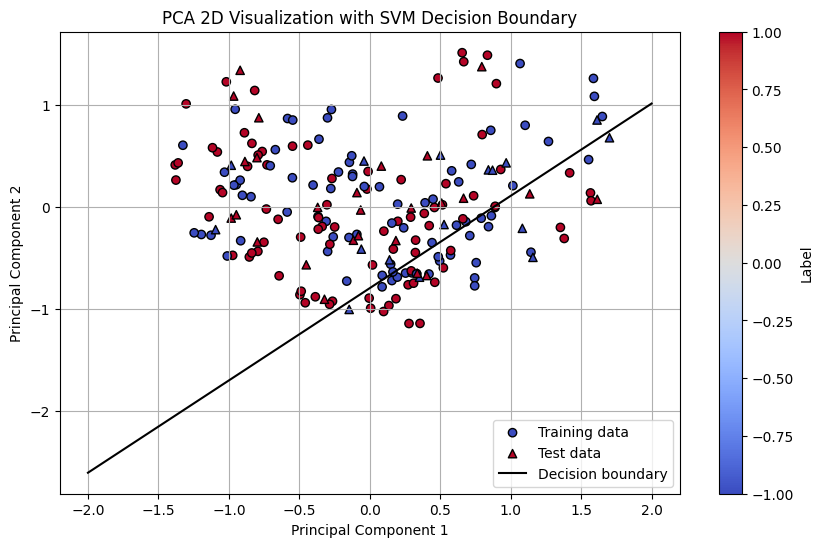

In [32]:
# Giảm chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
X_train_pca_2d = pca.fit_transform(X_train)
X_test_pca_2d = pca.transform(X_test)

# Vẽ dữ liệu và đường phân loại
plt.figure(figsize=(10, 6))

# Vẽ điểm dữ liệu
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolors='k', label='Training data')
plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=y_test, cmap='coolwarm', marker='^', edgecolors='k', label='Test data')

# Vẽ đường phân loại
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-', label='Decision boundary')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Visualization with SVM Decision Boundary')
plt.legend()
plt.colorbar(label='Label')
plt.grid(True)
plt.show()


Hình phân loại này hơi khó để trực quan và đường phân loại trực quan cho siêu phẳng 60 chiều trên có thể không đúng

**Nhận xét**:  
Mô hình không cho độ chính xác cao = 1.0 như trên tập train, tuy nhiên độ chính xác vẫn ở mức chấp nhận được 0.83.  
Lý do vì đây là HardMargin đảm bảo tập train là 1.0 (nếu data có thể tách rò ràng bằng 1 siêu phẳng tuyến tính).  
Tuy nhiên đường phân loại này có thể không phân loại đúng với 1 vài trường hợp có trong tập test.   
Bởi vậy có thể sử dụng theo hướng SoftMargin để xem độ chính xác phân loại trên test có thể cao hơn 0.83 không.  